In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [23]:
data_dir = r'D:\BigData And DataMining\Data Mining\TimeSeris\GPS\Geolife Trajectories 1.3\Data'
user_id = '000'
trajectory_file = os.path.join(data_dir, user_id, 'Trajectory', '20081027115449.plt')

In [24]:
print(df.head(1))
print(df.shape[1])  # In ra số cột

    latitude   longitude  zero  altitude     date_days        date      time
0  39.907414  116.370017     0        92  39747.572303  2008-10-26  13:44:07
7


In [25]:
df = pd.read_csv(trajectory_file,skiprows=6, header=None)
df.columns = ['latitude', 'longitude', 'zero', 'altitude', 'date_days', 'date', 'time']


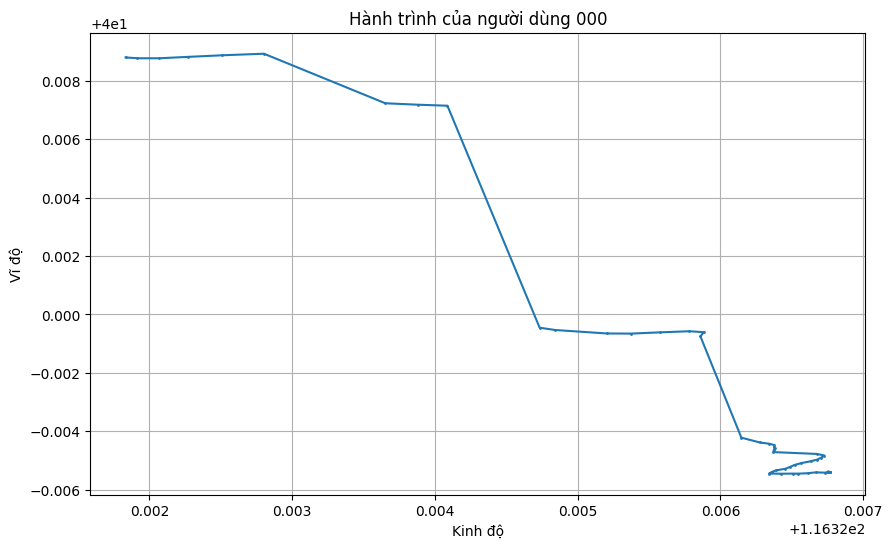

In [26]:
# Vẽ hành trình
plt.figure(figsize=(10, 6))
plt.plot(df['longitude'], df['latitude'], marker='o', markersize=1, linestyle='-')
plt.title(f'Hành trình của người dùng {user_id}')
plt.xlabel('Kinh độ')
plt.ylabel('Vĩ độ')
plt.grid(True)
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_27896\834029683.py:19: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_hourly = df.set_index('timestamp').resample('1H').sum()['dist'].fillna(0)


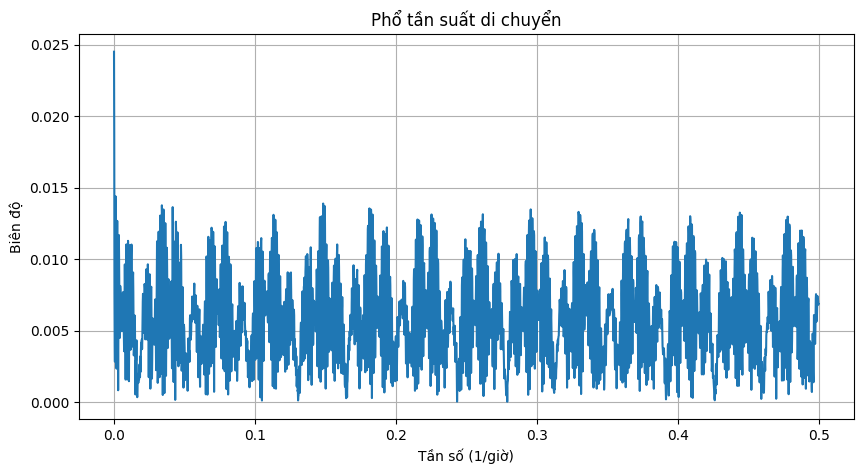

In [10]:
import pandas as pd
import numpy as np

# Đọc dữ liệu
df = pd.read_csv("gop_data.csv")

# Chuyển đổi timestamp_days từ dạng float (số ngày) sang datetime
df['timestamp'] = pd.to_datetime('1899-12-30') + pd.to_timedelta(df['timestamp_days'], unit='D')

# Sắp xếp theo thời gian
df = df.sort_values('timestamp')

# Tính khoảng cách di chuyển
df['lat_diff'] = df['latitude'].diff()
df['lon_diff'] = df['longitude'].diff()
df['dist'] = np.sqrt(df['lat_diff']**2 + df['lon_diff']**2)

# Tính tổng khoảng cách di chuyển theo mỗi giờ
df_hourly = df.set_index('timestamp').resample('1H').sum()['dist'].fillna(0)

# Biến đổi Fourier (FFT)
from scipy.fft import fft, fftfreq
import matplotlib.pyplot as plt

N = len(df_hourly)
T = 1.0  # 1 giờ
yf = fft(df_hourly)
xf = fftfreq(N, T)[:N//2]

# Vẽ phổ tần suất
plt.figure(figsize=(10, 5))
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.title("Phổ tần suất di chuyển")
plt.xlabel("Tần số (1/giờ)")
plt.ylabel("Biên độ")
plt.grid()
plt.show()


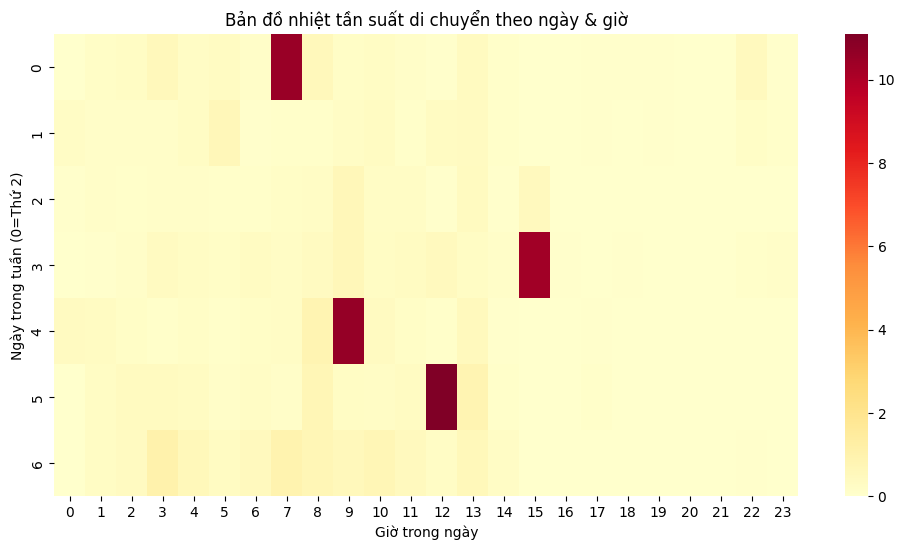

In [11]:
import seaborn as sns

df['hour'] = df['timestamp'].dt.hour
df['weekday'] = df['timestamp'].dt.dayofweek

pivot_table = df.groupby(['weekday', 'hour'])['dist'].sum().unstack().fillna(0)

plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, cmap='YlOrRd')
plt.title("Bản đồ nhiệt tần suất di chuyển theo ngày & giờ")
plt.xlabel("Giờ trong ngày")
plt.ylabel("Ngày trong tuần (0=Thứ 2)")
plt.show()


Top địa điểm thường xuyên đến:
place_id
 0      125851
-1        4408
 187      3231
 49       3158
 102      2865
Name: timestamp, dtype: int64


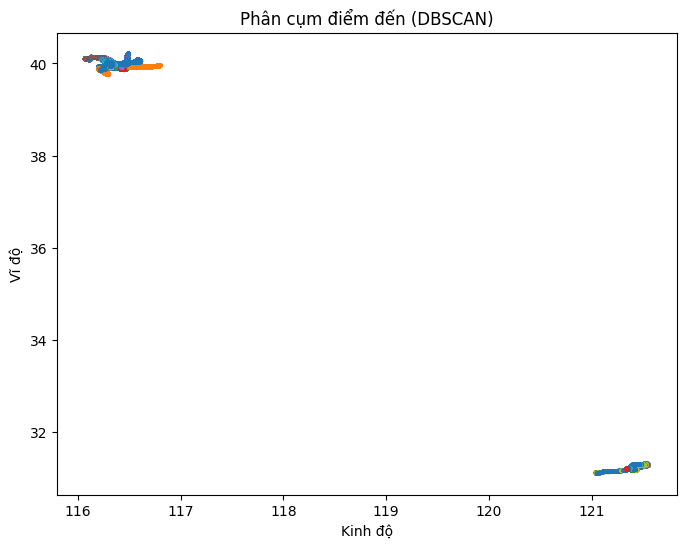

In [14]:
from sklearn.cluster import DBSCAN

coords = df[['latitude', 'longitude']].dropna().to_numpy()
db = DBSCAN(eps=0.001, min_samples=10).fit(coords)
df['place_id'] = db.labels_

# Tần suất đến mỗi địa điểm
place_freq = df.groupby('place_id')['timestamp'].count().sort_values(ascending=False)
print("Top địa điểm thường xuyên đến:")
print(place_freq.head())

# Visual hóa điểm đến
plt.figure(figsize=(8,6))
plt.scatter(df['longitude'], df['latitude'], c=df['place_id'], cmap='tab10', s=5)
plt.title("Phân cụm điểm đến (DBSCAN)")
plt.xlabel("Kinh độ")
plt.ylabel("Vĩ độ")
plt.show()
